<a href="https://colab.research.google.com/github/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Netflix-Movies-and-TV-Shows-Clustering**






##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**           - Owes Khan (Cohort Zurich)

# **Project Summary -**

**Project Name:** Netflix Movies and TV Shows Clustering

In this project  dataset consists of tv shows and movies available on Netflix as of 2019.The aim of this project is to find clusters.In this project, required to do: (1)Exploratory Data Analysis, (2) Understanding what type content is available in different countries, (3) Is Netflix has increasingly focusing on TV rather than movies in recent years,  (4) Clustering similar content by matching text-based features.

**Data Description:**
* **show_id :** Unique ID for every Movie / Tv Show

* **type :** Identifier - A Movie or TV Show

* **title :** Title of the Movie / Tv Show

* **director :** Director of the Movie

* **cast :** Actors involved in the movie / show

* **country :** Country where the movie / show was produced

* **date_added :** Date it was added on Netflix

* **release_year :** Actual Releaseyear of the movie / show

* **rating :** TV Rating of the movie / show

* **duration :** Total Duration - in minutes or number of seasons

* **listed_in :** Genere

* **description:** The Summary description



# **GitHub Link -**https://github.com/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do:**


*   Exploratory Data Analysis
*   Understanding what type content is available in different countries

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features











# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as map
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [3]:
# Load Dataset
data_path='https://github.com/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv?raw=true'
df=pd.read_csv(data_path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [6]:
df['duration'].nunique

<bound method IndexOpsMixin.nunique of 0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object>

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

* 2389 nulls in 'director'
* 718 nulls in 'cast'
* 507 nulls in 'country'
* 10 nulls in 'date_added'
* 7 nulls in rating

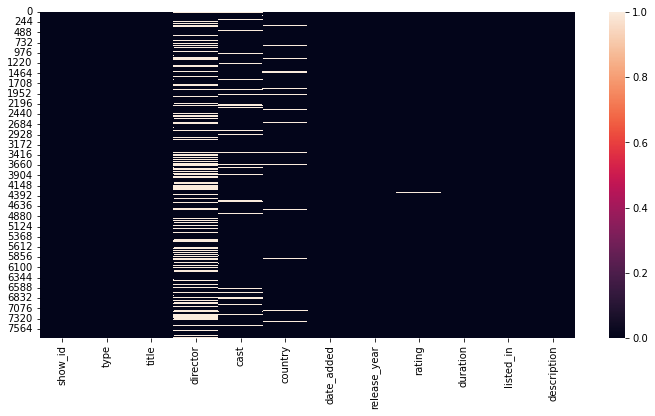

In [10]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

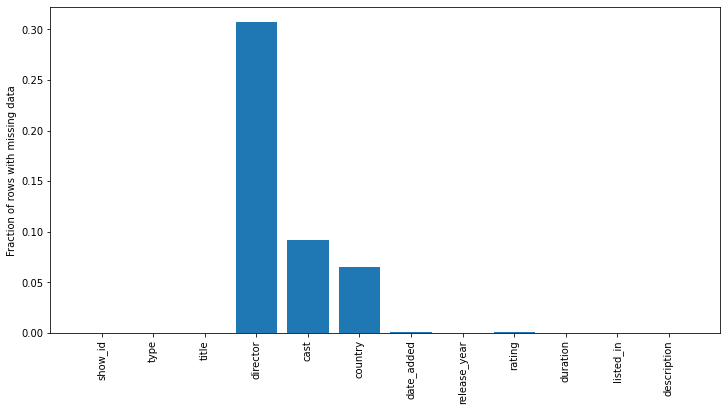

In [11]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### What did you know about your dataset?

The dataset given is a dataset of TV Shows and Movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

From this dataset we have to find Exploratory Data Analysis,   Understanding what type content is available in different countries, Is Netflix has increasingly focusing on TV rather than movies in recent years and Clustering similar content by matching text-based features.

The above dataset has 7787 rows and 12 columns. There are some mising values so we need to handle the null values but no duplicate values in the dataset.The columns that have missing values are as follows: (1)director (2)cast (3)country (4)date_added (5)rating.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

* **show_id :** Unique ID for every Movie / Tv Show

* **type :** Identifier - A Movie or TV Show

* **title :** Title of the Movie / Tv Show

* **director :** Director of the Movie

* **cast :** Actors involved in the movie / show

* **country :** Country where the movie / show was produced

* **date_added :** Date it was added on Netflix

* **release_year :** Actual Releaseyear of the movie / show

* **rating :** TV Rating of the movie / show

* **duration :** Total Duration - in minutes or number of seasons

* **listed_in :** Genere

* **description:** The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to data
data=df.copy()

# Create two data frames saperate one contains the TV Show data and second one contains the Movie data
df_tv=data[(data['type']=="TV Show")]
df_movie=data[(data['type']=="Movie")]

In [16]:
#movie duration subsetting

# convert object data to int (for purpose of classification)
df_movie['duration']=df_movie['duration'].str.replace(' min','')
df_movie['duration']=df_movie['duration'].astype(str).astype(int)

# convert object data to int (for purpose of classification)
df_tv['duration']=df_tv['duration'].str.replace(' Seasons','')
df_tv['duration']=df_tv['duration'].str.replace(' Season','')
df_tv['duration']=df_tv['duration'].str.replace('s','')
df_tv['duration']=df_tv['duration'].astype(str).astype(int)


In [17]:
# Create three dataframes
# create 3 dataframe which classify the movies in to three class

long_movie= df_movie[df_movie['duration'] >= 150]
av_time_movie= df_movie[ (df_movie['duration'] < 150) & (df_movie['duration'] > 100 )]
short_movie= df_movie[df_movie['duration'] <= 100]

print("Number of long movies are :",len(long_movie))
print("Number of Average time movies are :",len(av_time_movie))
print("Number of Short movies are :",len(short_movie))

Number of long movies are : 243
Number of Average time movies are : 2191
Number of Short movies are : 2943


In [18]:
#changed date added to datetime object 

# convert "date_added" column in to datetime format
data["date_added"] = pd.to_datetime(data['date_added'])

# create two columns year and month for analysis purpose.
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [19]:
# get unique catogorties for classification

data["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
#Assigning the Ratings into grouped categories

ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

# Find the which is the target audiance for any program.
data["target_ages"].value_counts()

Adults        3620
Teens         2317
Older Kids    1330
Kids           513
Name: target_ages, dtype: int64

In [21]:
# create dataframe for getting the name of actors

actor_df=data["cast"].fillna('')
actor_df.isnull().sum()

0

In [22]:
# fuction for count actor name

def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(actor_df)
  for i in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[i]).split(","))
  for i in cast_count_final:
    if i not in cast_count:
      cast_count[i] = cast_count_final.count(i)
  return cast_count

In [23]:
cast_df = convert_to_list(data)
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])

#highest number movie for actors
casts=casts_df.sort_values('count', ascending=False).drop('').reset_index()
casts

,index,count
0,Anupam Kher,38
1,Takahiro Sakurai,28
2,Shah Rukh Khan,27
3,Om Puri,27
4,Boman Irani,25
...,...,...
35367,Juan Manuel Diaz,1
35368,Ana Wills,1
35369,Mauricio Figueroa,1
35370,Matias Maldonado,1


In [24]:
# create dataframe for getting the name of genre

genre=data["listed_in"]

In [25]:
# fuction for count the genre name

def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(genre)
  for i in range(len(genre_list)):
    genre_count_final.extend(str(genre_list[i]).split(","))
  for i in genre_count_final:
    if i not in genre_count:
      genre_count[i] = genre_count_final.count(i)
  return genre_count

In [26]:
genre_df = convert_to_list(data)
genre_df = pd.DataFrame.from_dict(genre_df, orient='index', columns=['count'])

#highest number genres
genre_df.sort_values('count', ascending=False)


,count
International Movies,2323
Dramas,1384
Comedies,1074
Documentaries,751
Dramas,722
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
Sports Movies,1
TV Sci-Fi & Fantasy,1


### What all manipulations have you done and insights you found?

I have done many manipulation in data. First I created two dataframe on the basis of TV Show and Movies , this is because of I want to classify the Movies in to three catogories Long, Average and Short time movies.

Second one is, I created new column in which I categoried the rating.From this I found that targeted audience is Adults.

Third one is, change the datatype of "data_added" column for analysis and also created two separate columns for further analysis Year and Months.

Other one is, I created two functions and got top actors and genres from the data.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Function to plot some basic graphs

In [27]:
#Function to plot countplot
def count_plot(col, df, Order = None):
  '''This function plots the count plot for the passed feature
     Pass column name (str), Pandas DataFrame, Order (list of indexes) to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col,data=df, order = Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable. As it puts observational counts in different category-based bins using bars.

In [28]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(df[col].value_counts())
  df[col].value_counts().plot.pie(autopct = '%1.1f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data. 

In [29]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data. 

### Univariate Analysis

#### Chart - 1 - Type (TV Shows/ Movies) 

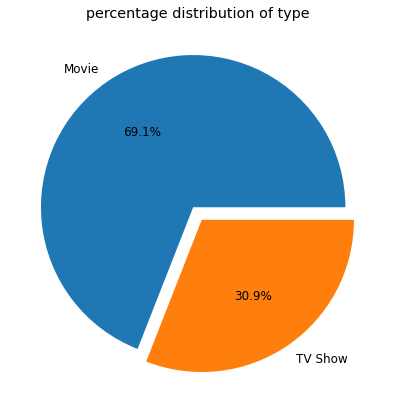

In [30]:
# Chart - 1 visualization code
pie_chart("type")

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

Here we get information that this dataset contains 5377 rows for Movies which is 69.1% and 2410 rows for TV Show which is 30.9%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the given data we can say that the data given here is more about Movies. It is impect on clustering.From this chart we can take further decisions because this chart shows Movies are watched more than TV shows on Netflix.With its reference we can decide the next strategy.

#### Chart - 2

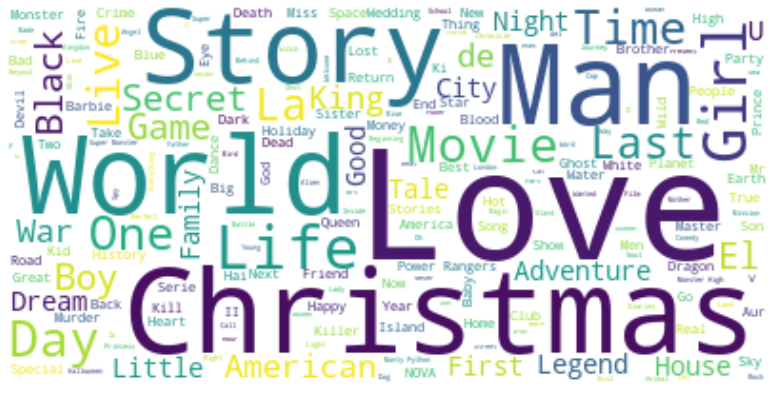

In [31]:
# Chart - 2 visualization code
col_word_cloud('title',df)

##### 1. Why did you pick the specific chart?

Word cloud chart. A word cloud is a visual representation of text data using color and font size to represent the frequency of a term or topic. Wordcloud visualizations make it easy to read and understand the most prominent terms.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Christmas","Love", "Man", "World", "Story" are very common in titles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart we can know which words occurs many times in the data.From this we can predict that what kind of data and and which type of titles for the TV Shows and Movies.

A major disadvantage here that we cannot draw any definite conclusion because it works on the frequency of the work.

#### Chart - 3

In [32]:
# Chart - 3 visualization code
#Directors having most counts of movies
df[df['director']!= 'Unknown']['director'].value_counts().head(20)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Robert Rodriguez           8
Kunle Afolayan             8
Hakan Algül                8
Shannon Hartman            8
Johnnie To                 8
Quentin Tarantino          8
Lance Bangs                8
Don Michael Paul           7
McG                        7
Justin G. Dyck             7
Name: director, dtype: int64

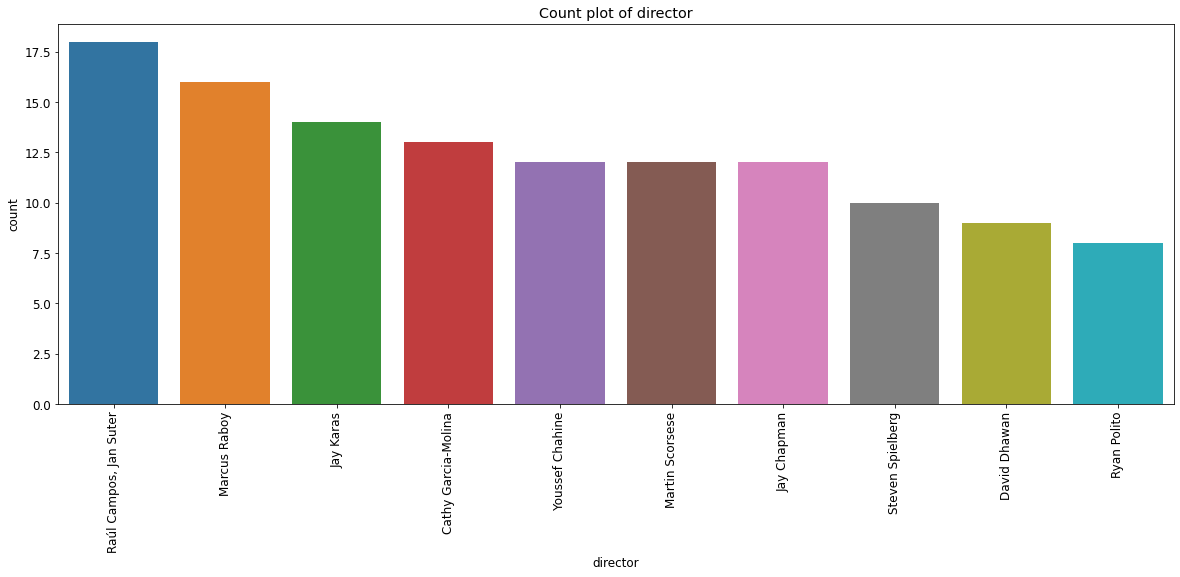

In [33]:
#Plotting the bar graph for top 10 directors who have most number of shows/movies in the dataset.
count_plot('director', df, df[df['director']!= 'Unknown']['director'].value_counts().head(10).index)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?


From the bar plot we found top 10 Directors with most number of Movies/Shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this information we can get better transparency on the bussiness. This information is very important for bussiness. From this information we can know that what is the contribution of which director in Entertainment field and also we can know that which director makes how many films and TV shows.



#### Chart - 4

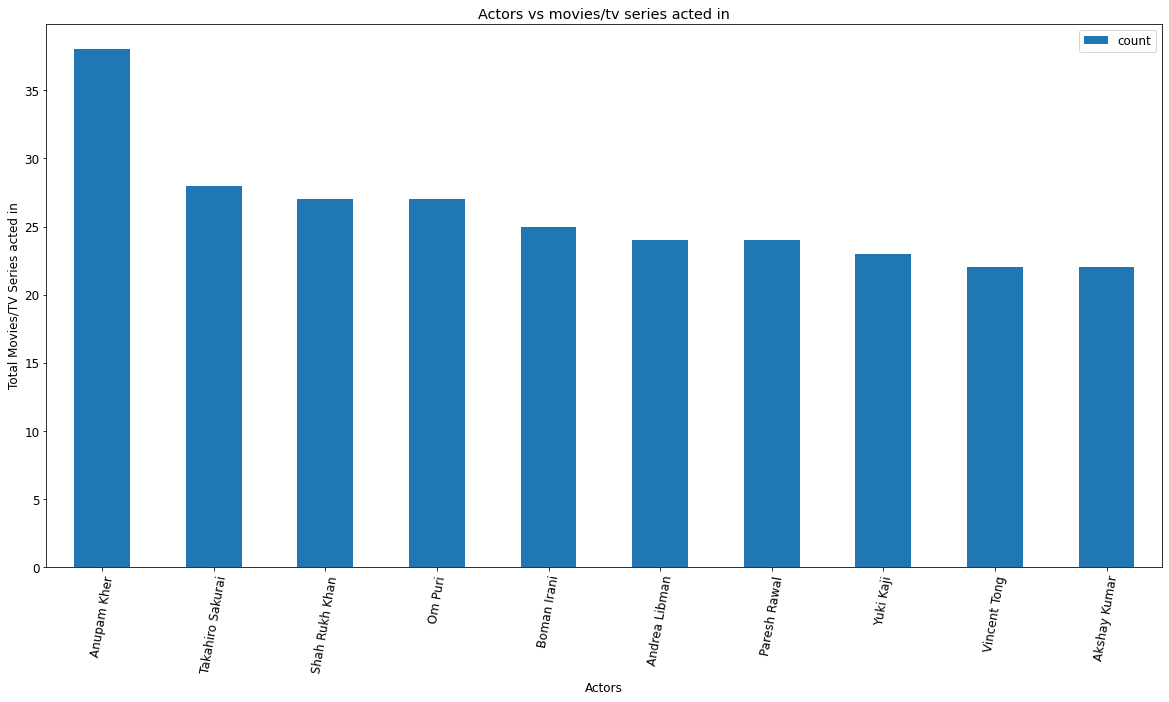

In [34]:
# Chart - 4 visualization code
# use the data frame which is created in data wrangling part.
casts_df.sort_values('count', ascending=False).drop('')

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
casts_df.sort_values('count', ascending=False).drop('').head(10).plot(kind='bar') # here we drop '' because we use it instead of nan
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series acted in")
plt.title("Actors vs movies/tv series acted in")
plt.xticks(rotation=80)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

I found many information from this graph. I found that Top Actors with highest count of Movies/TV Shows on Netflix. Top actor is Anupam Kher.This data shows  Anupam Kher has worked 35-40 times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This data (visulization) has a good effect in bussiness. From this information we can say that being a top actor, Anupam Kher must be charging good money. From this data, we can also decide the budget of Movie and TV Shows. From this data we can say which actor is more active and more famous.

#### Chart - 5

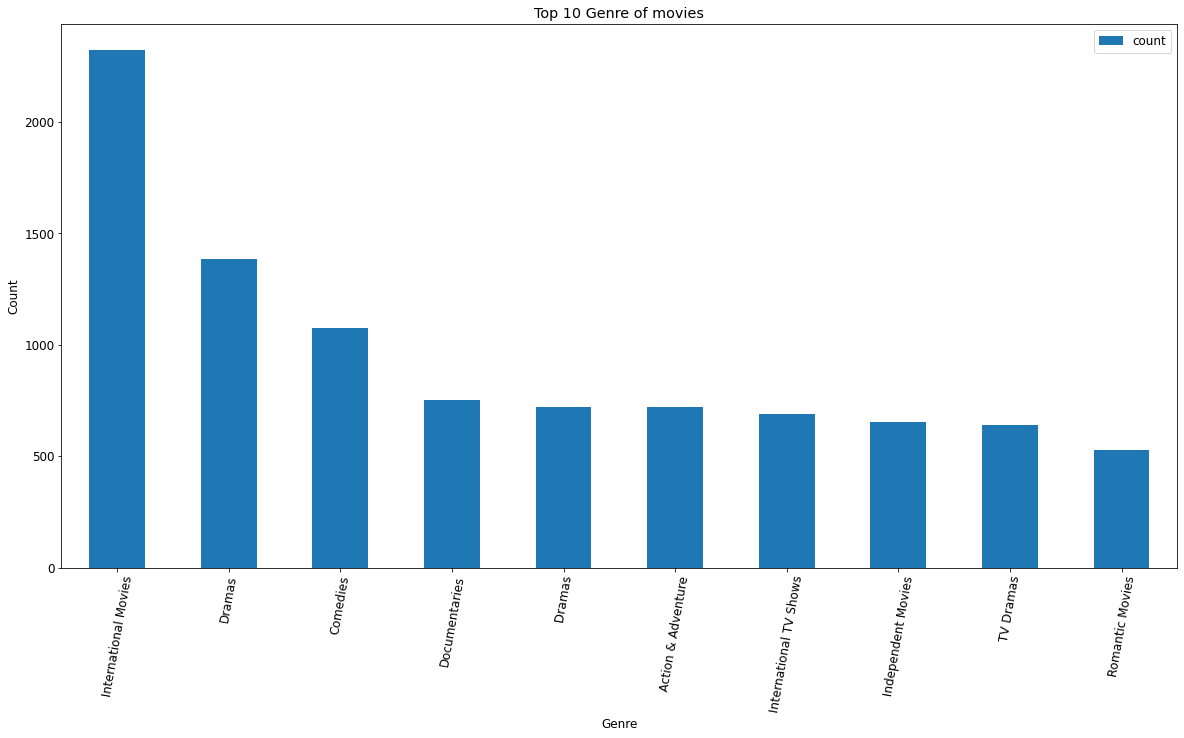

In [35]:
# Chart - 5 visualization code
# use the data frame which is created in data wrangling part.
genre_df .sort_values('count', ascending=False)

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
genre_df .sort_values('count', ascending=False).head(10).plot(kind='bar') 
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Genre of movies")
plt.xticks(rotation=80)
plt.show()

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

I found many information from this graph. I found that Top  Genre withh highest count of Movies/TV Shows on Netflix. Top Genre is International Movies.This data shows  International movies are more than 2000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This data (visulization) has a good effect in bussiness. From this information we can say that top  genre is International Movies, People like such movies more as compare to others. From this data we can say what are other genres are more famous.

#### Chart - 6

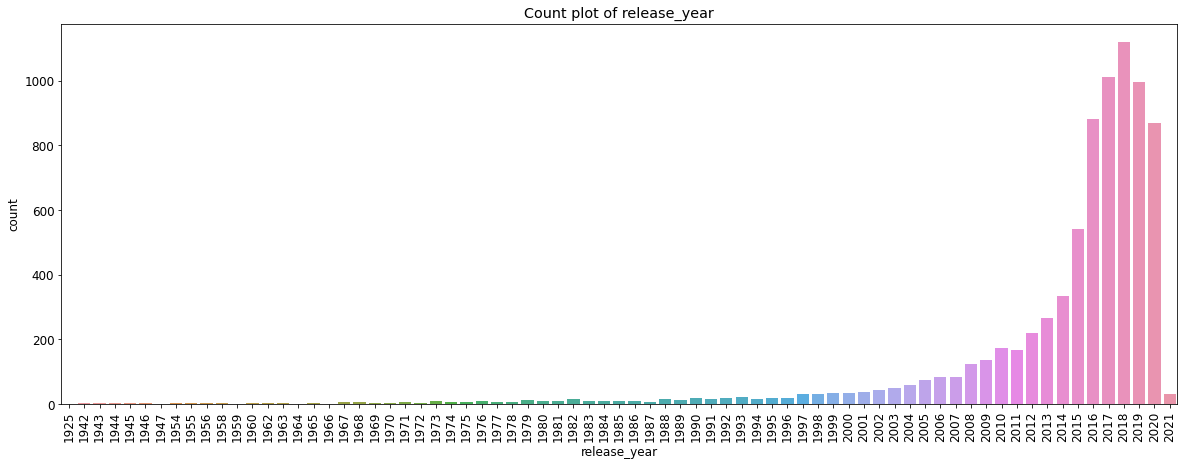

In [36]:
# Chart - 6 visualization code
#Count plot for release year
count_plot('release_year', df)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is a sudden rise in the number of TV shows and Movies from year 2010.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above chart we can see that company is growing yearly in exponetial manner from 2010 to 2018 but there is decrease in 2019 and 2020 it show negative impact.

#### Chart - 7

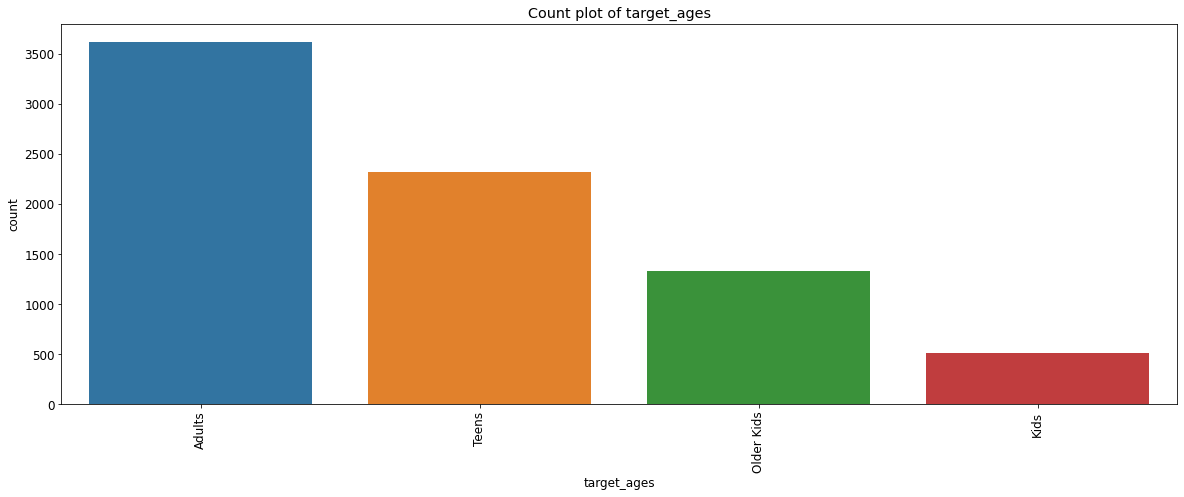

In [37]:
# Chart - 7 visualization code
count_plot('target_ages', data)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can see that the most targeted auduience is Adults then teens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,the gained insights help creating a positive business impact. From the information we get, we can know what kind of content we should provide for company growth and business expansion.Majority of the audience here is adults so it can be known from here to give something that they like. We can take advertisements that are used by adults.

#### Chart - 8 - Duration Analysis (Univariate Analysis)

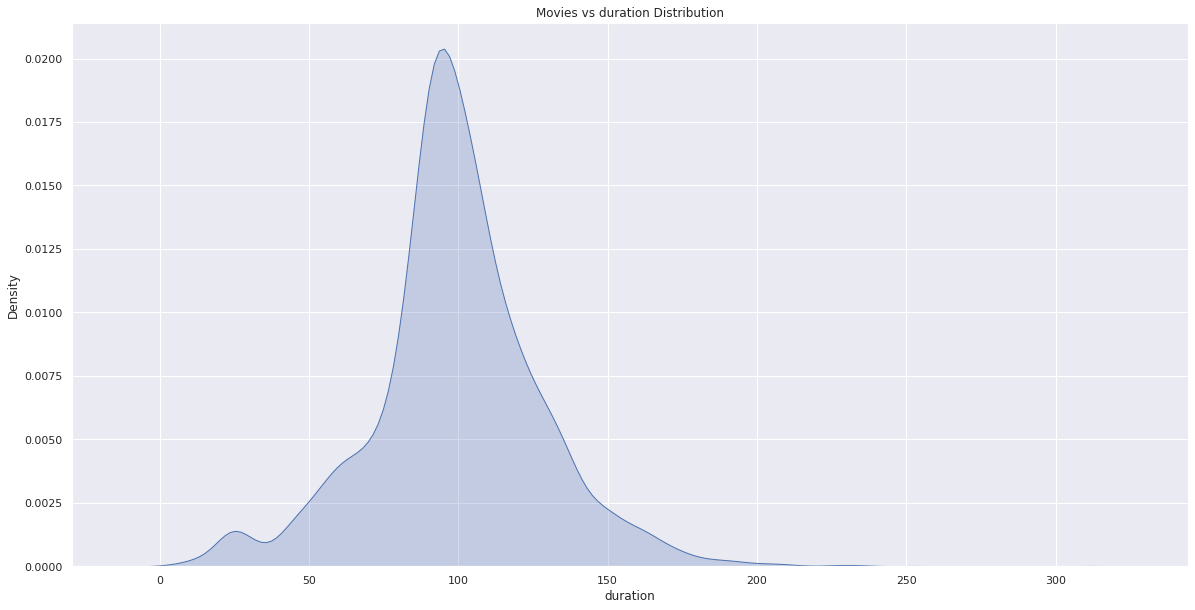

In [42]:
# Chart - 8 visualization code

sns.set(style="darkgrid")
sns.kdeplot(data=df_movie['duration'], shade=True)
plt.title("Movies vs duration Distribution")
plt.show()

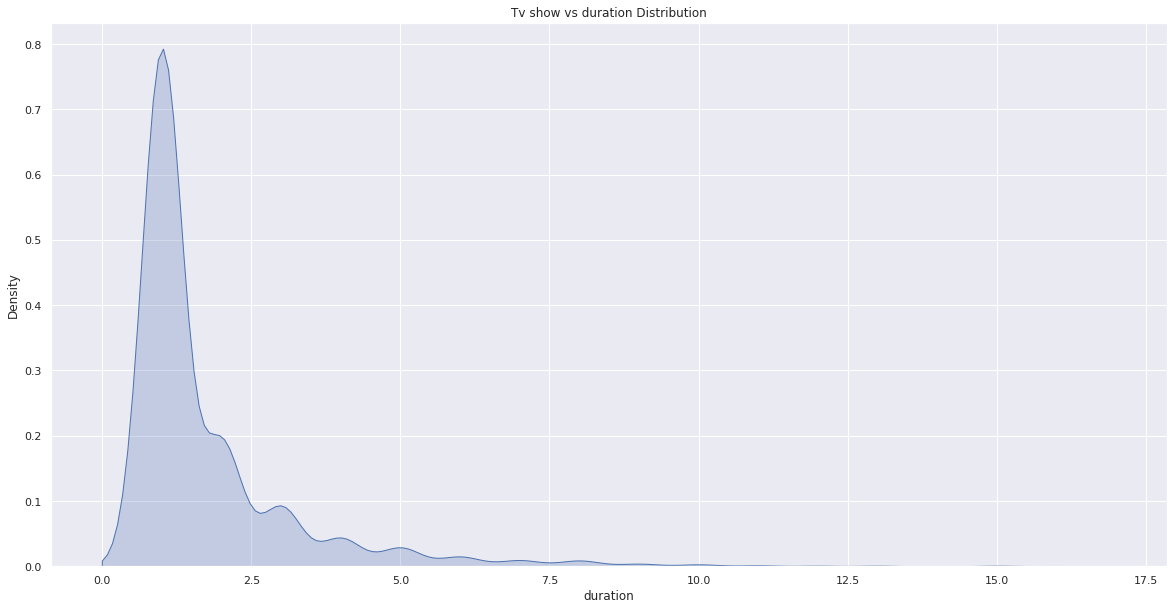

In [41]:

sns.set(style="darkgrid")
sns.kdeplot(data=df_tv['duration'], shade=True)
plt.title("Tv show vs duration Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A density plot is a representation of the distribution of a numeric variable that uses a kernel density estimate to show the probability density function of the variable. 



##### 2. What is/are the insight(s) found from the chart?

From the first chart we can know that most content are about 70 to 120 min duration for Movies.

From the second chart we can know that most of the shows are 1 to 2 seasons long.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact. The given duration data can be used by us in future.From the given information we can determine the moive and tv show duration to be produces in future.


#### Chart - 9  Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [55]:
#Extracting year wise TV Show & Movie added
yr_added_movie = data[data['type'] == "Movie"]['year_added'].value_counts().reset_index().sort_values(by = 'index')
yr_added_tv = data[data['type'] == "TV Show"]['year_added'].value_counts().reset_index().sort_values(by = 'index')

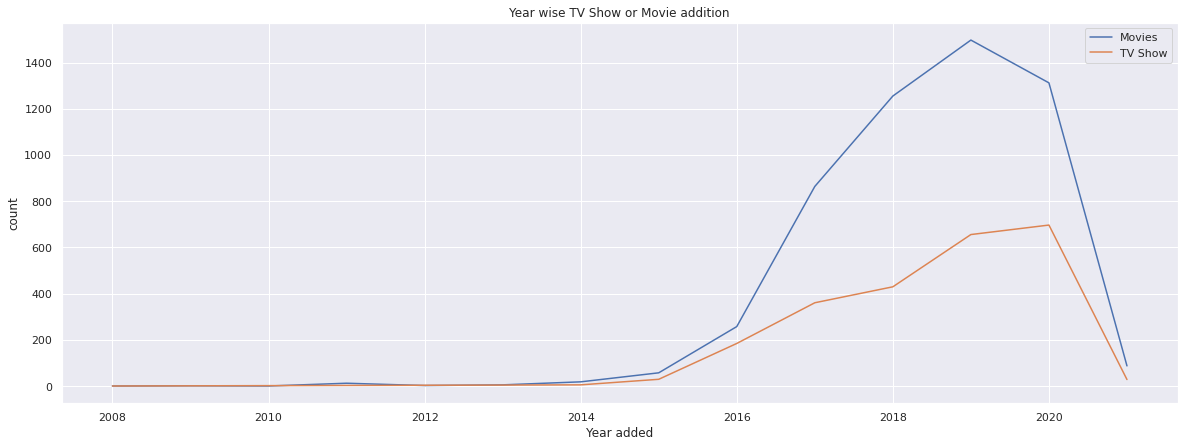

In [56]:
#Plotting a line graph
plt.figure(figsize = (20,7))
plt.plot('index','year_added', data = yr_added_movie, label = 'Movies')
plt.plot('index','year_added', data = yr_added_tv, label = 'TV Show')
plt.title('Year wise TV Show or Movie addition')
plt.xlabel('Year added')
plt.ylabel('count')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart, also referred to as a line graph or a line plot, connects a series of data points using a line. This chart type presents sequential values to help you identify trends. Most of the time, the x-axis (horizontal axis) represents a sequential progression of values.

##### 2. What is/are the insight(s) found from the chart?

we are able to compare the tvshows and movies realease in different year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph also we can infer that number of movie addition has decresed after 2019 whereas number of TV Show addition has increased after 2019.

This shows that netflix is focusing more on TV shows.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***